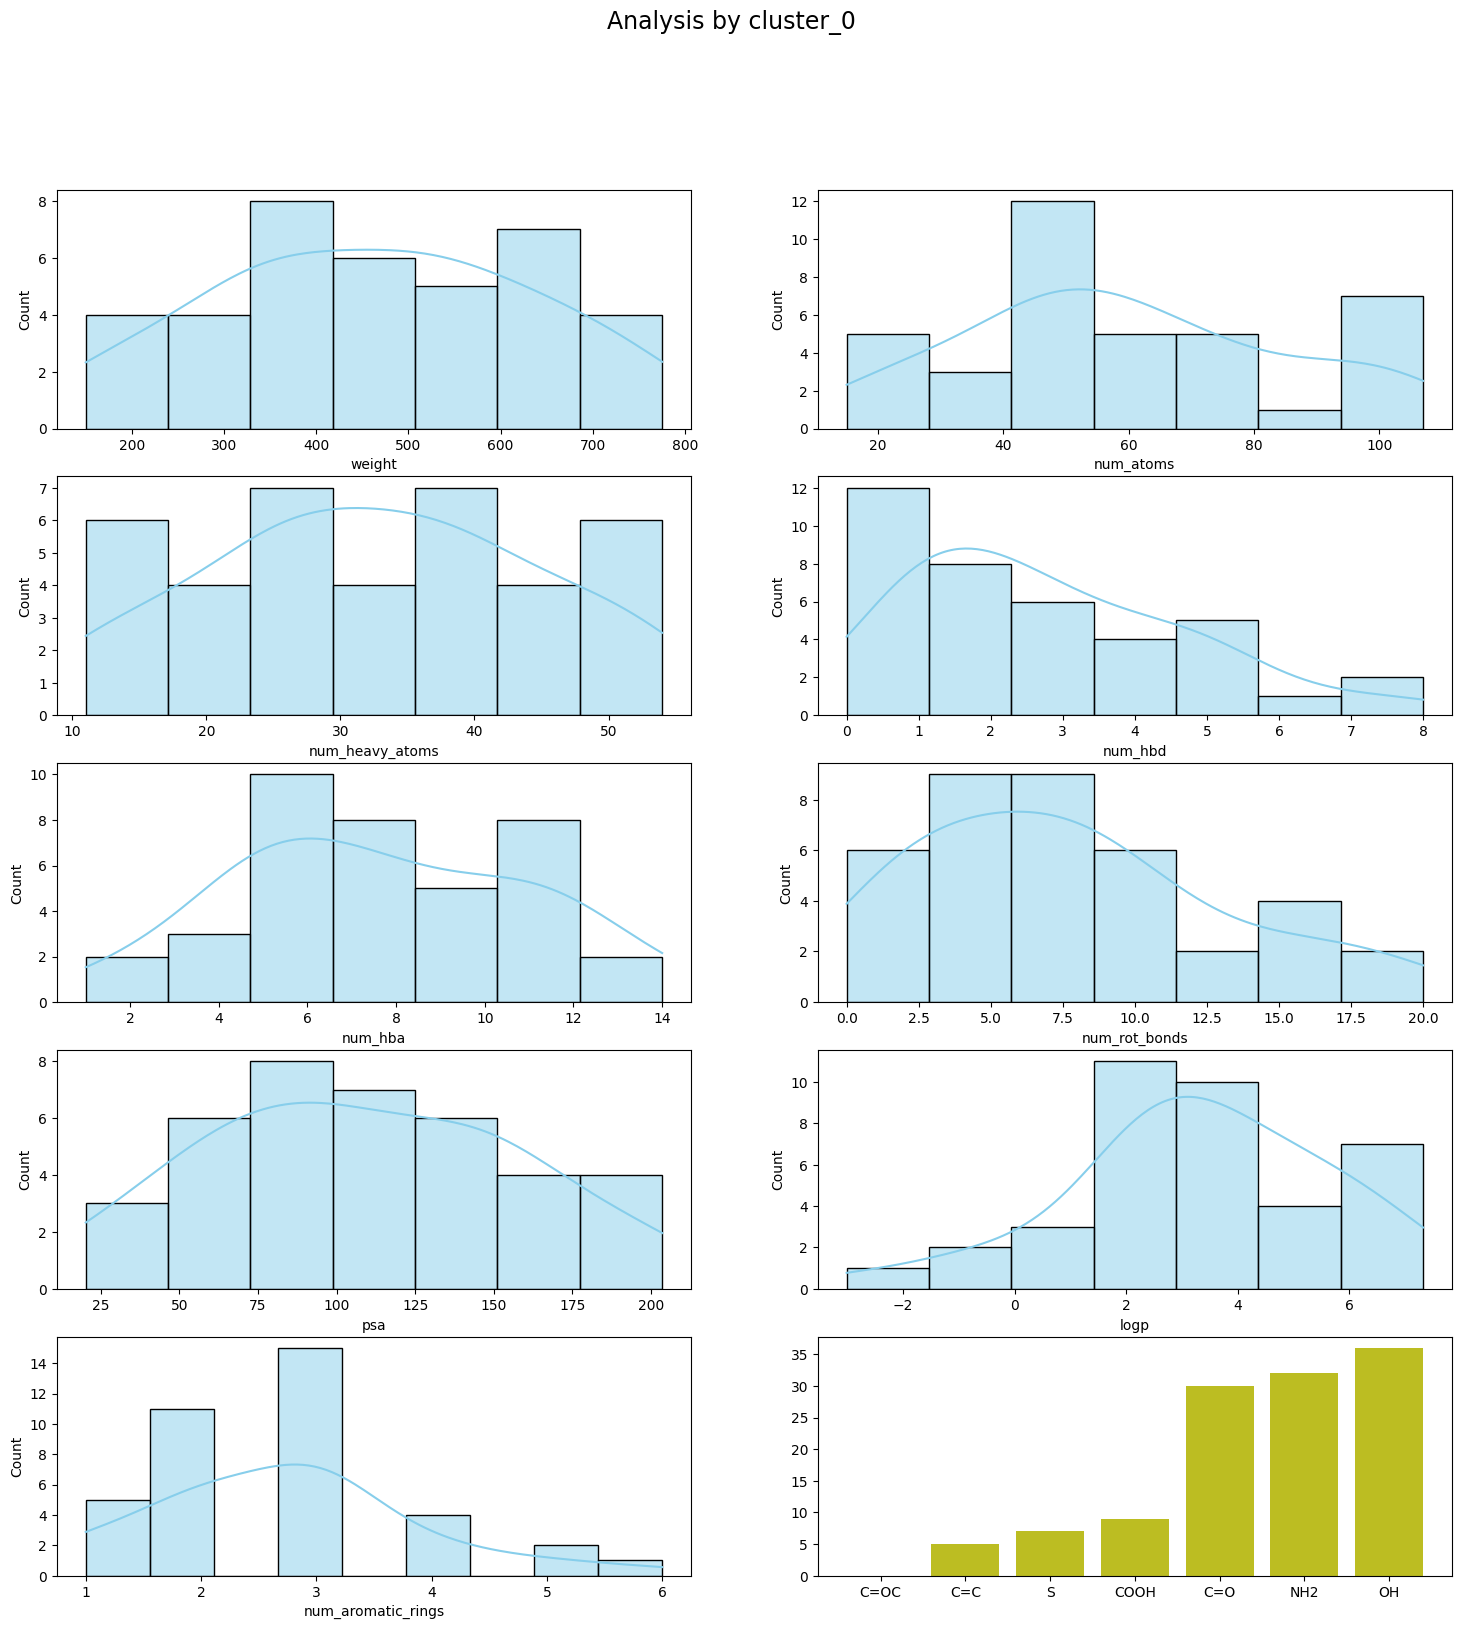

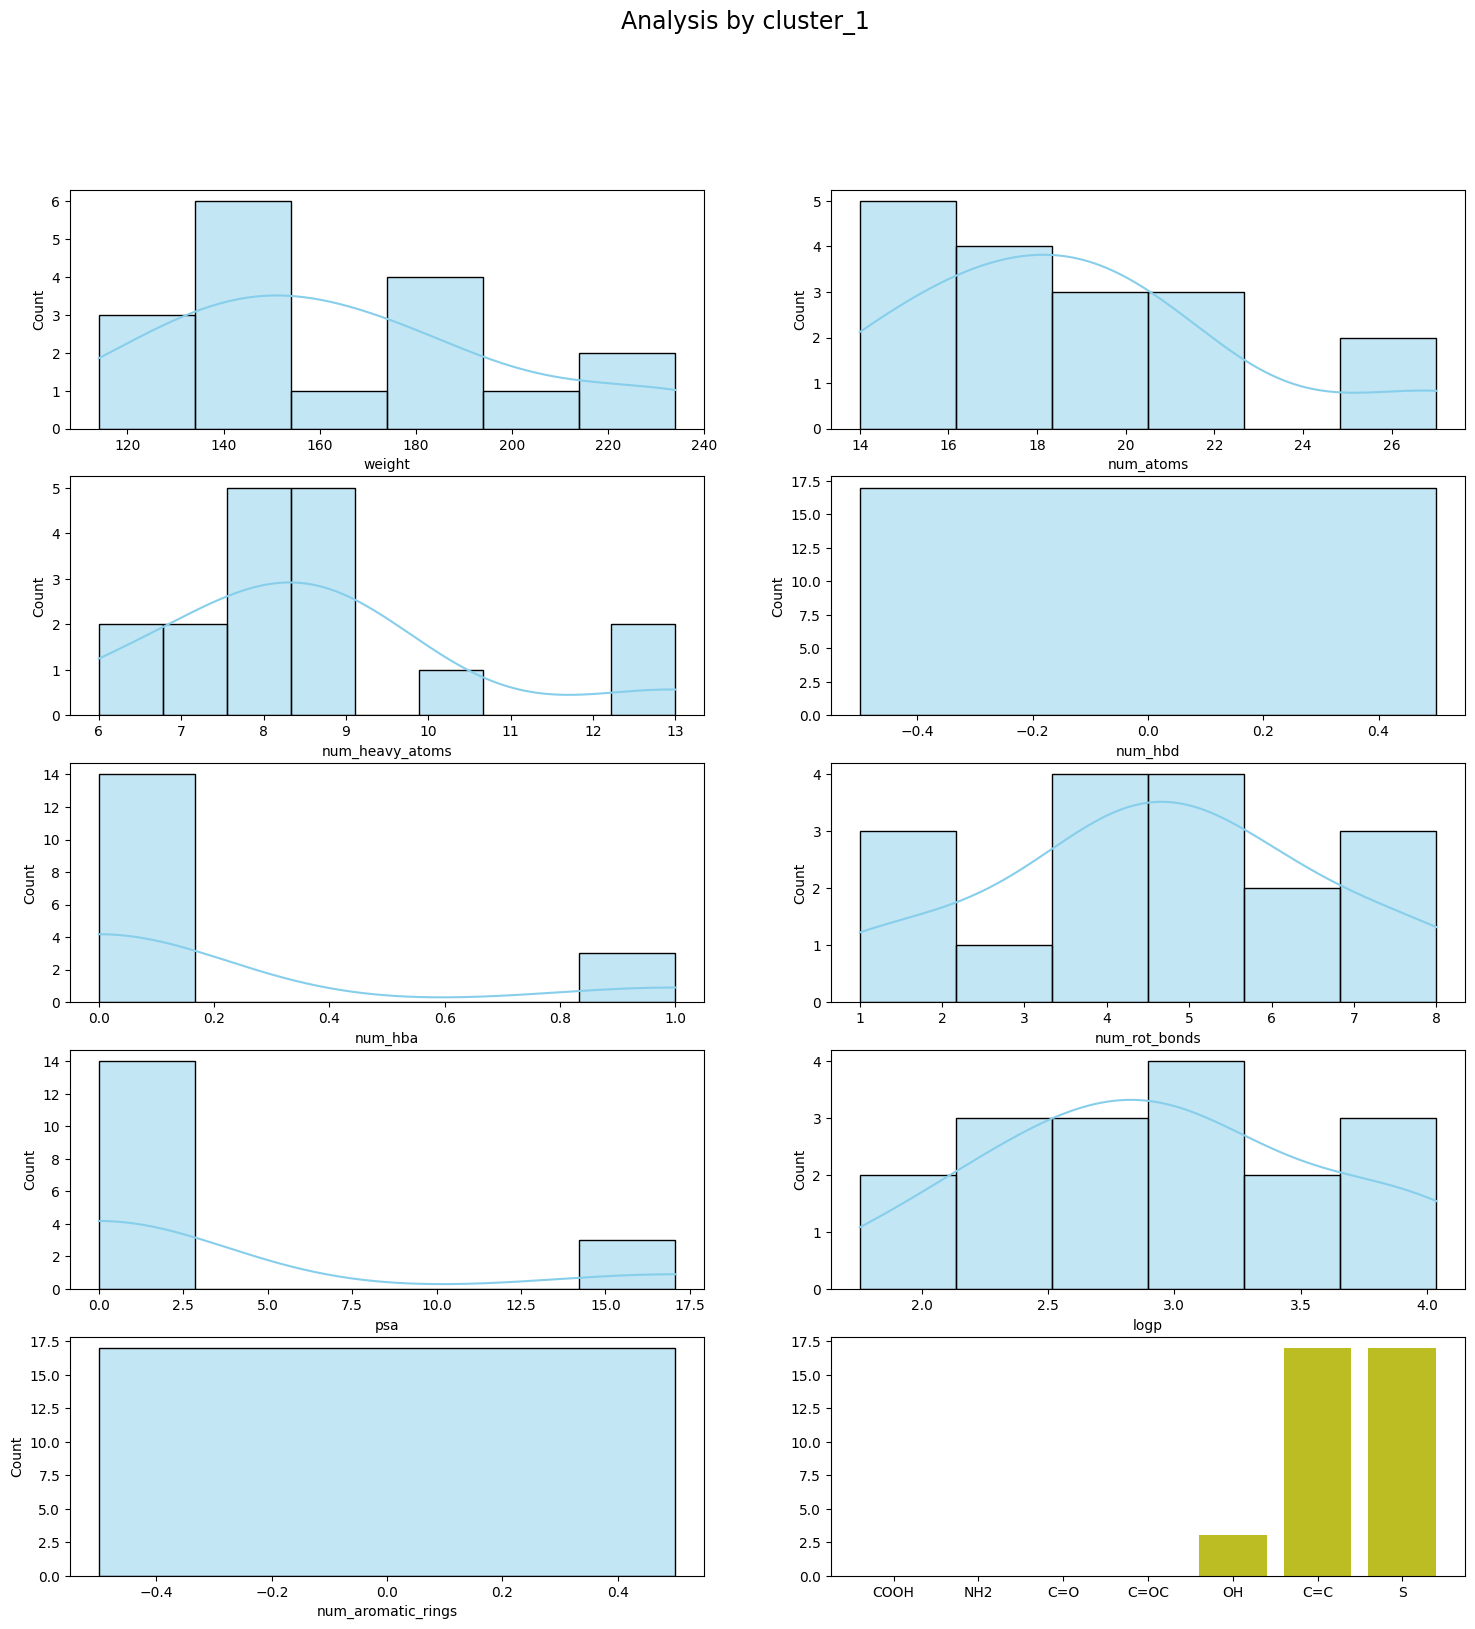

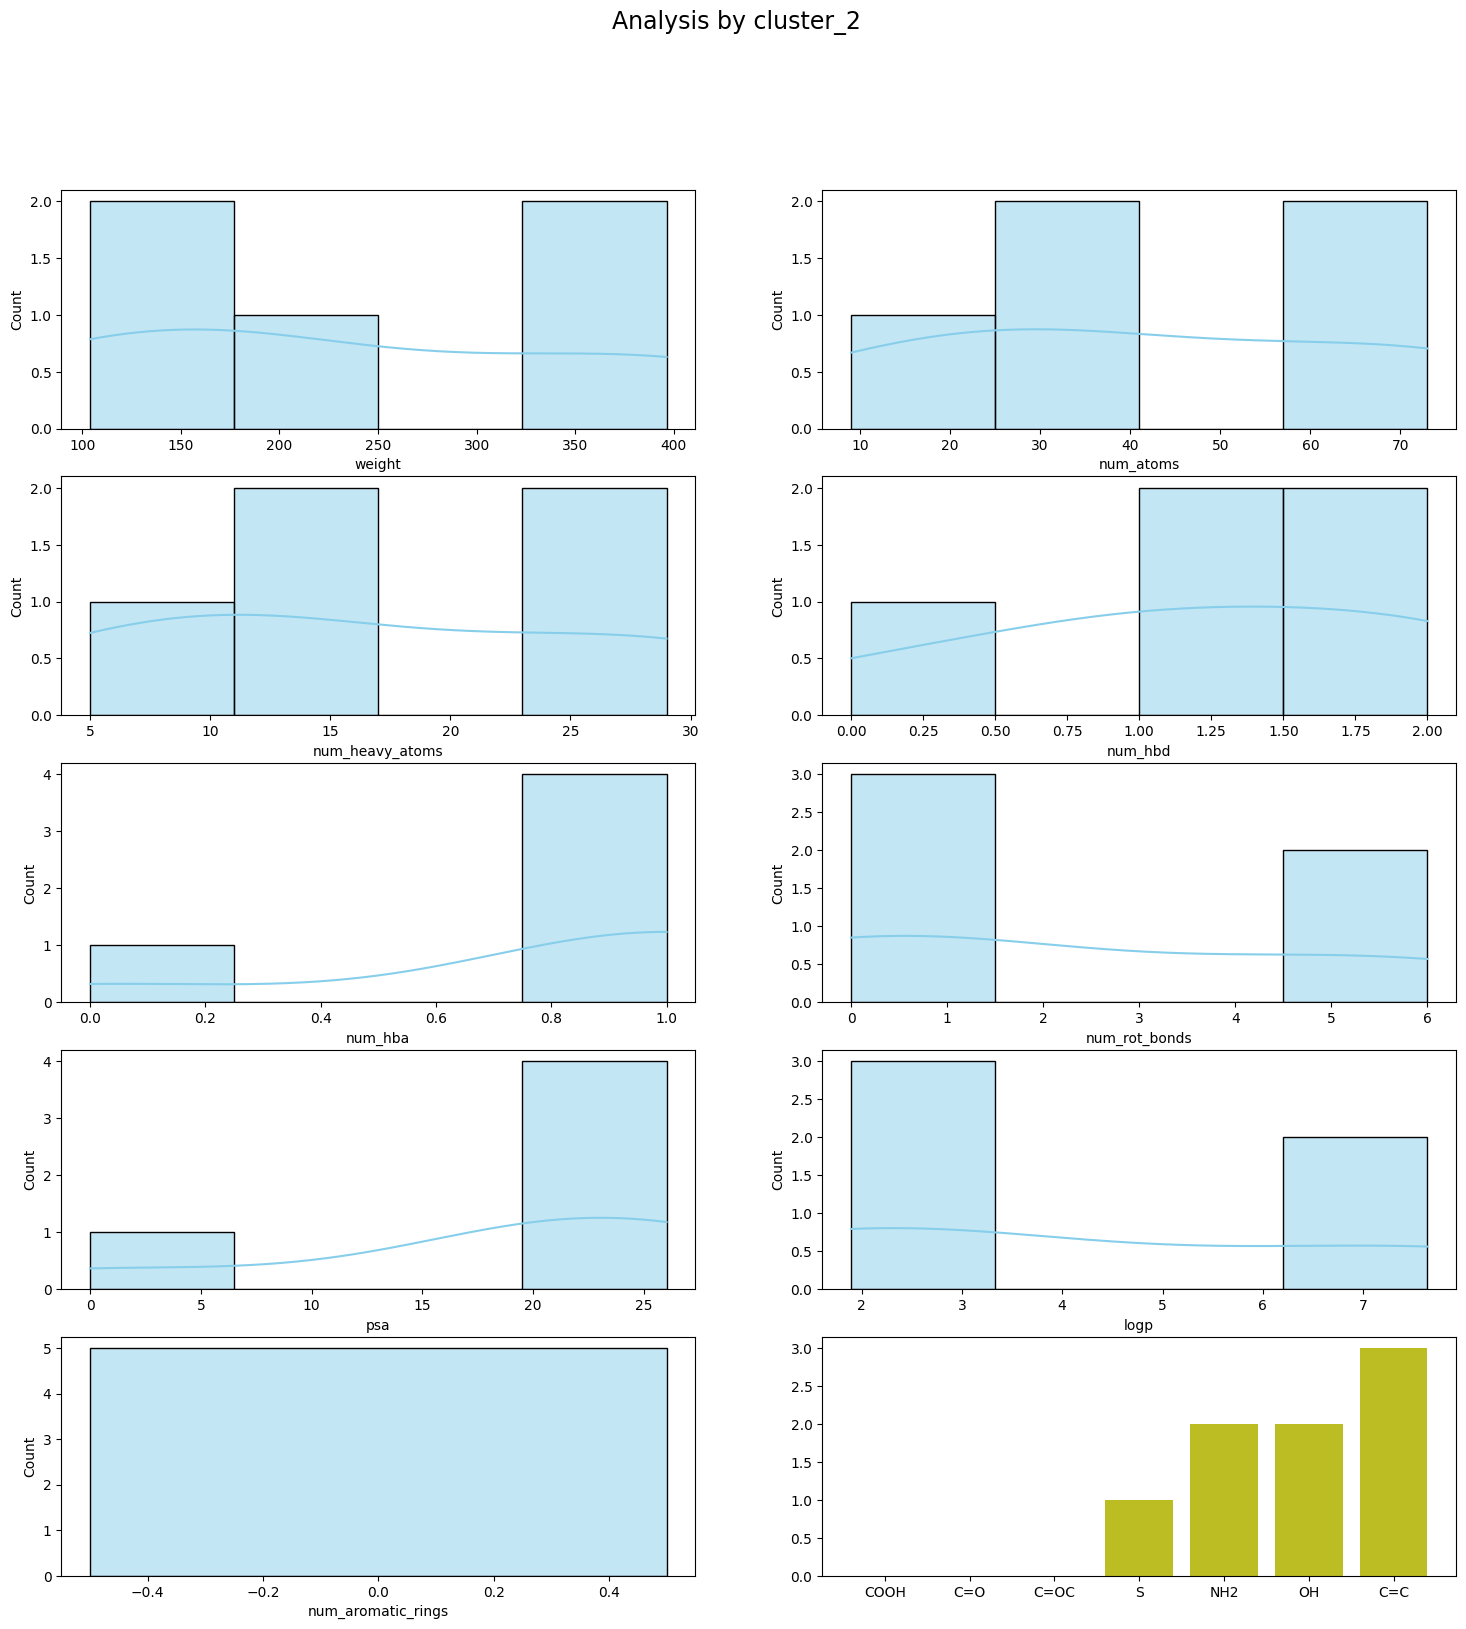

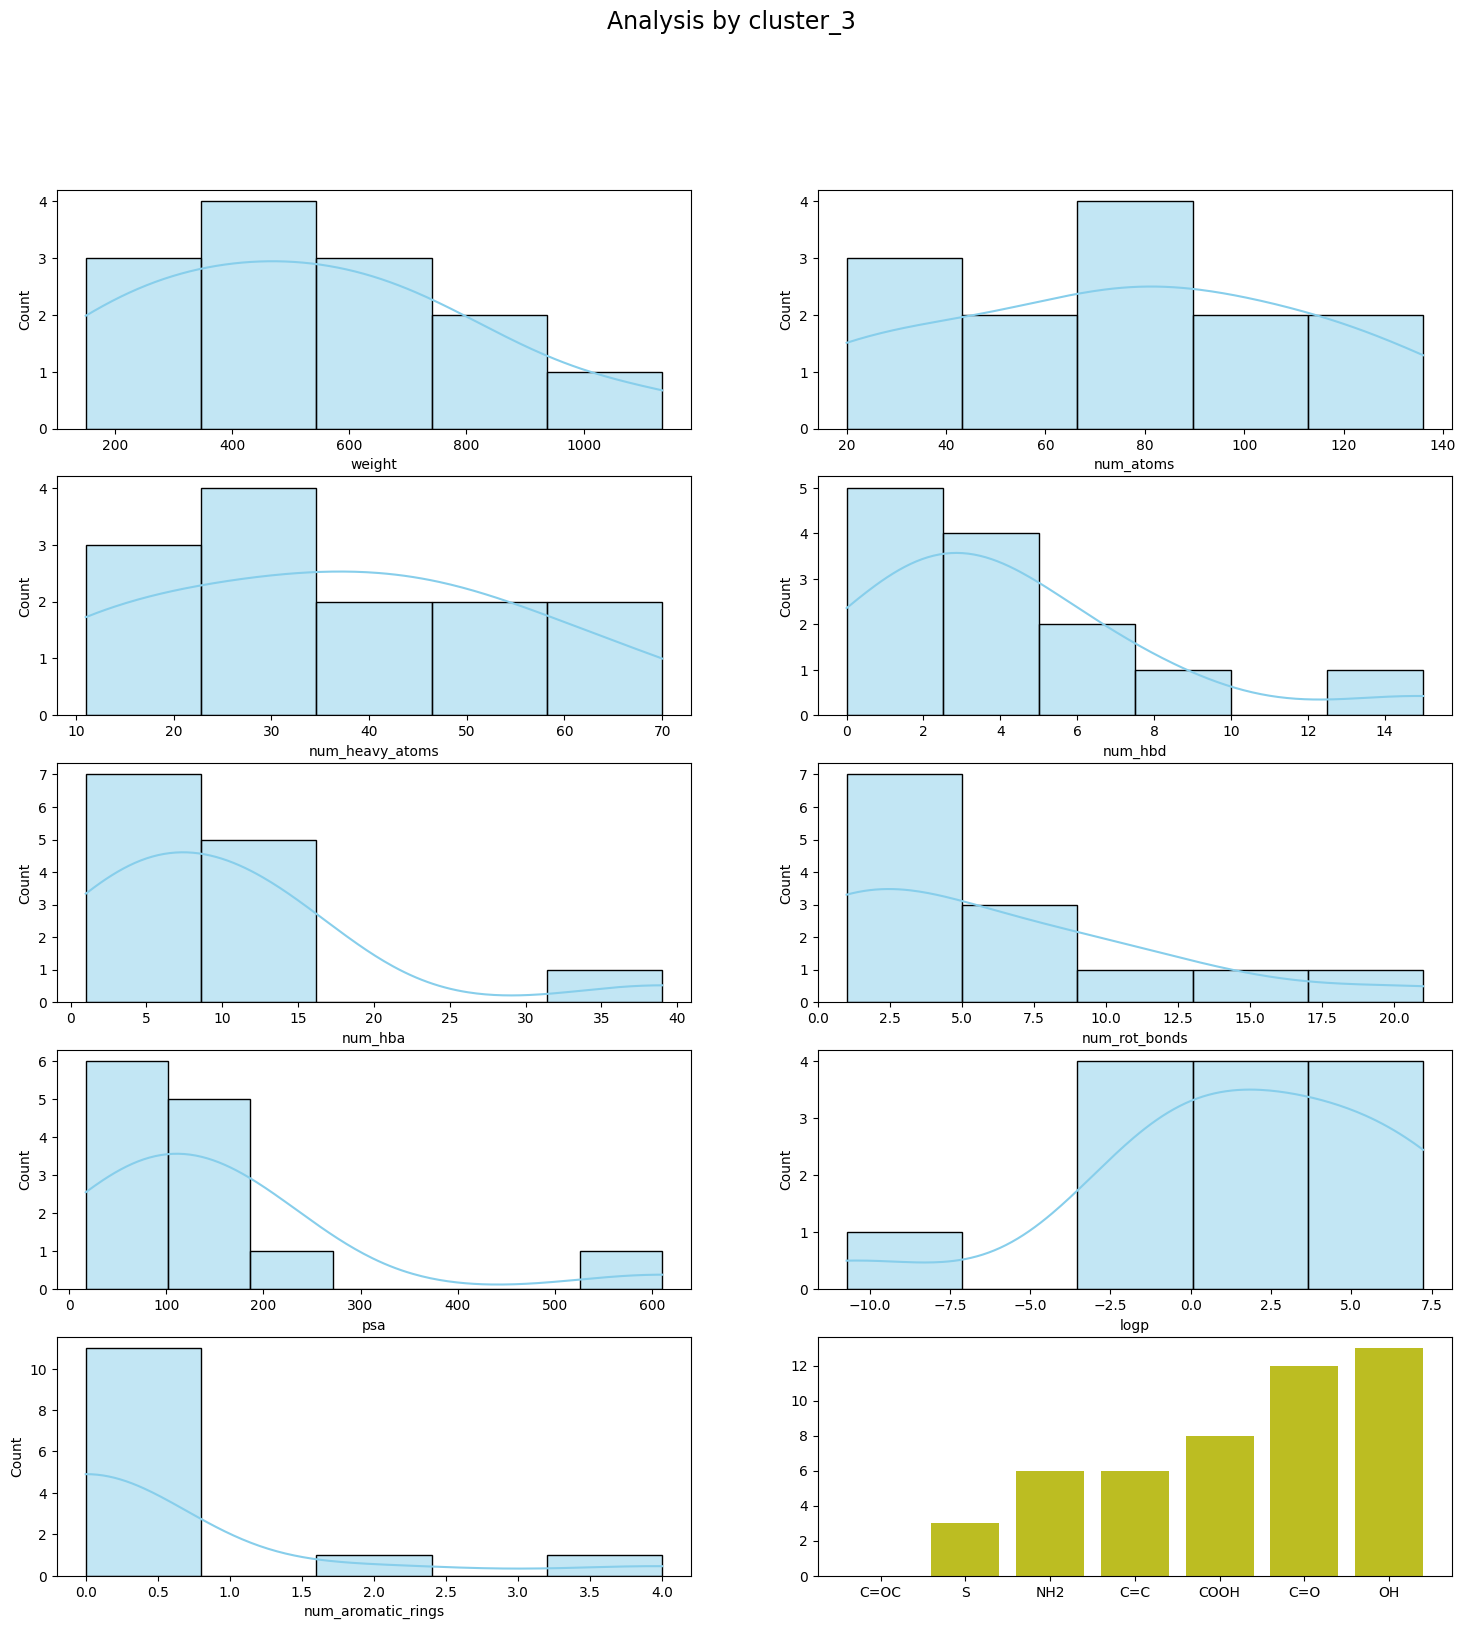

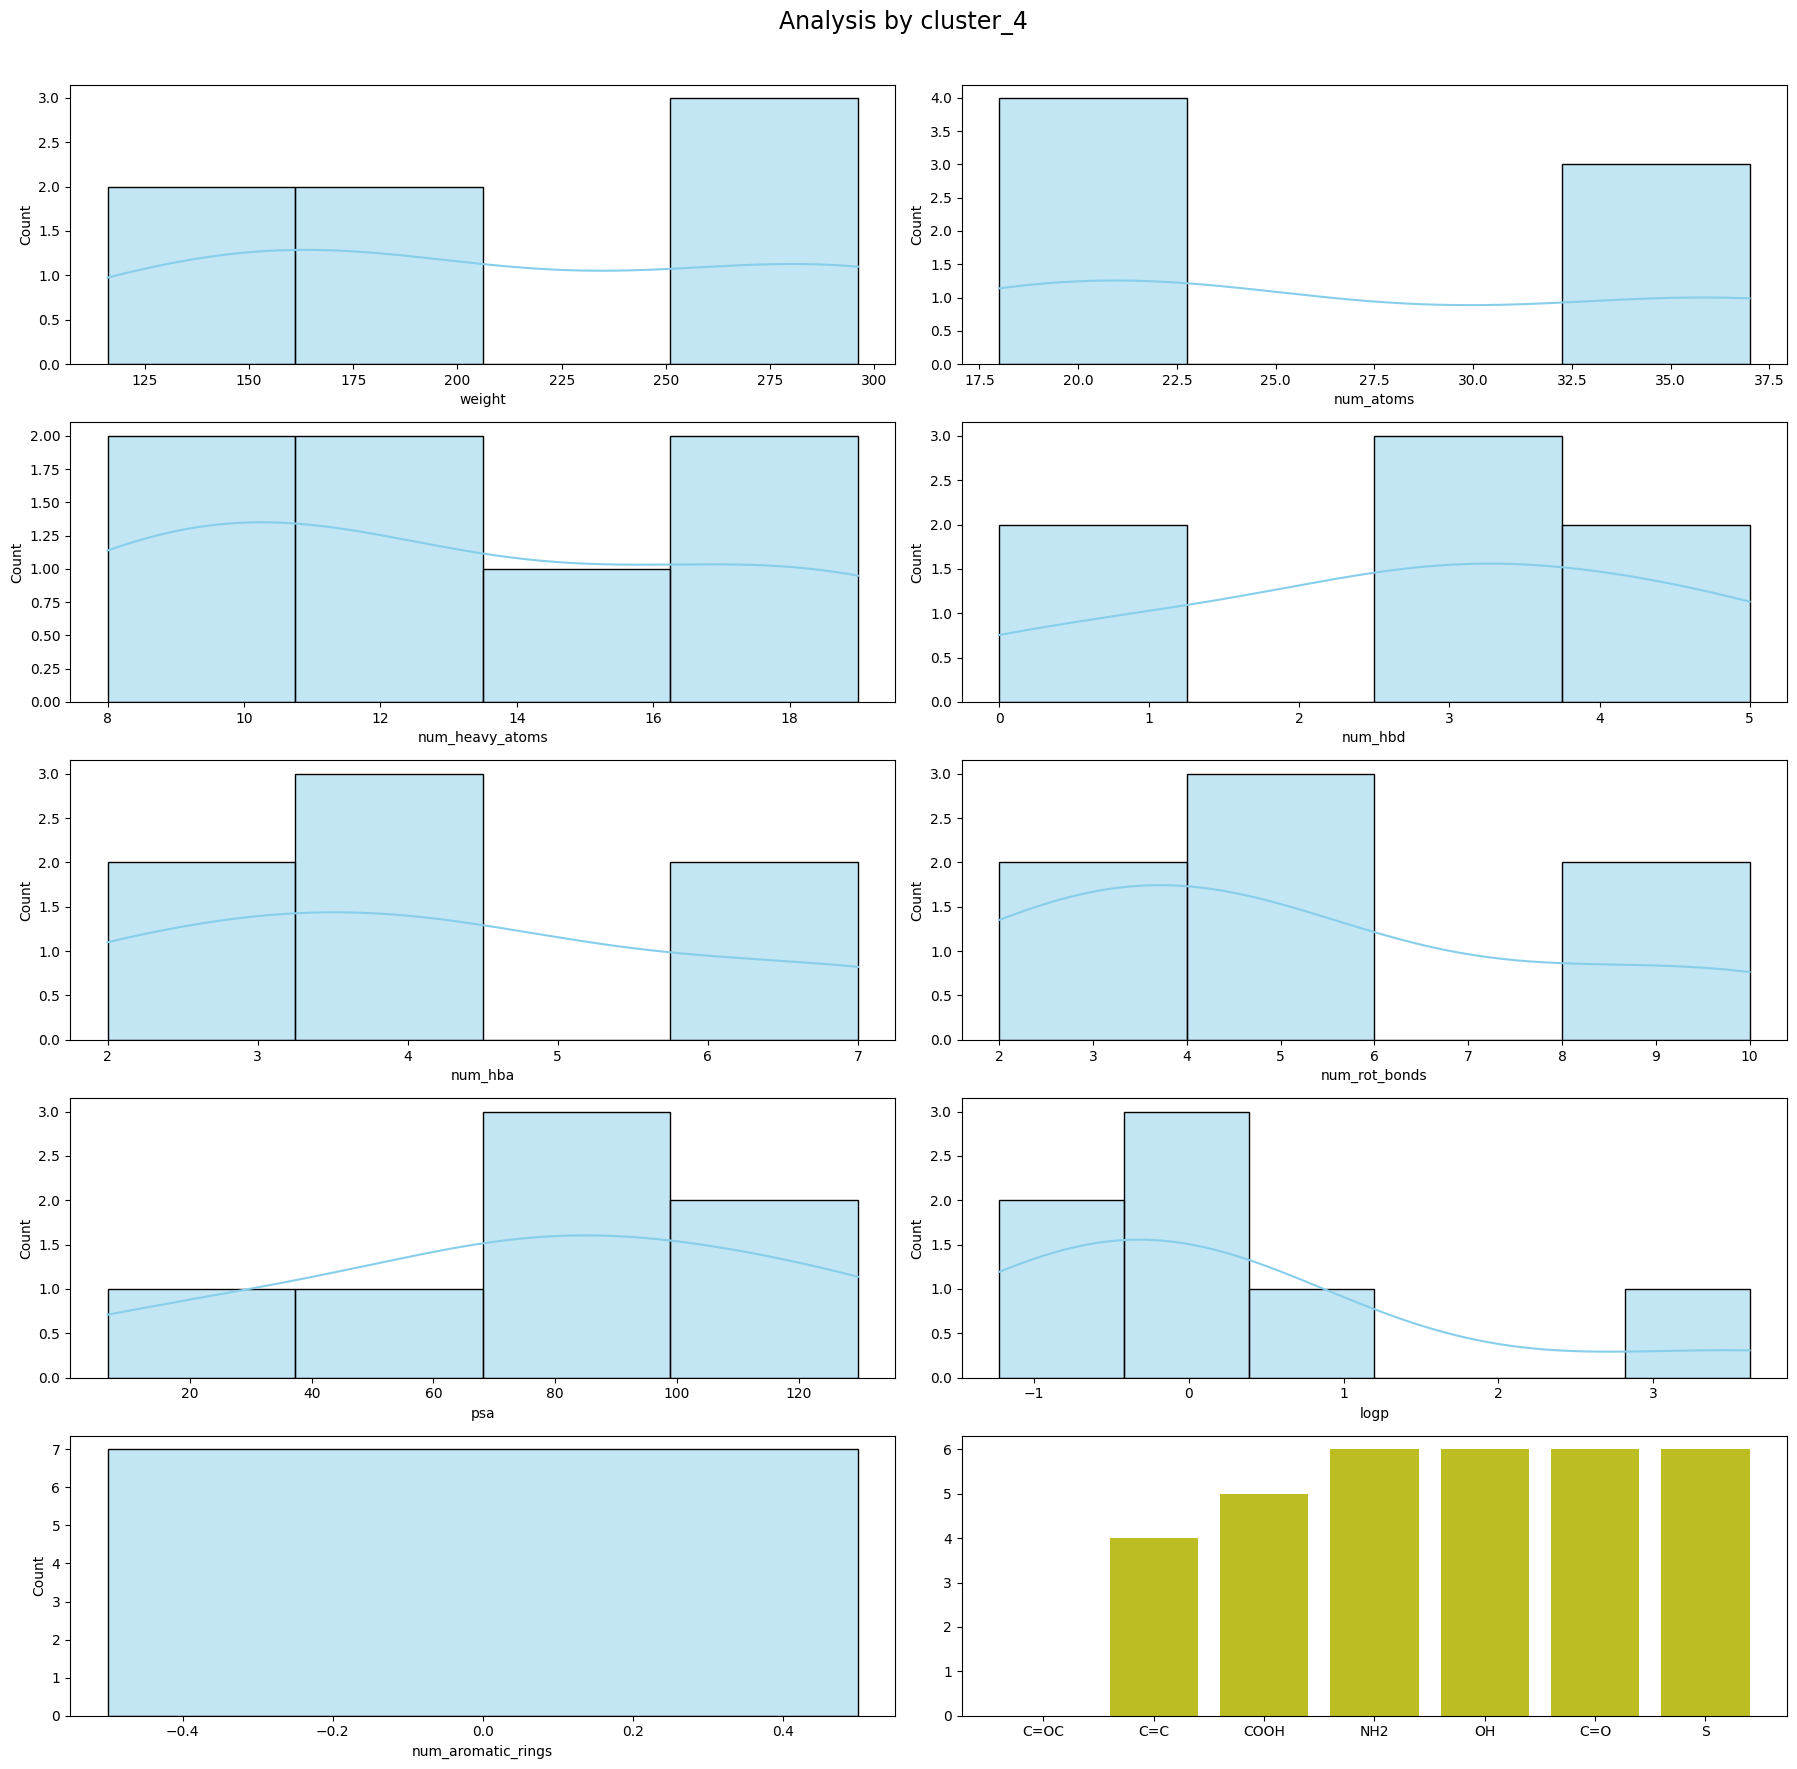

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns            
import matplotlib.pyplot as plt   
###################################
n_cluster = 5
path = '/home/ahr/Desktop/Work/MolDescriptors/clusters_csvs'

for v in range(n_cluster):
    # Get clusters mol descriptors data
    df = pd.read_csv(path + '/Mol_prop_by_clusters_' + str(v) + '_vf.csv')
    # Get clusters mol descriptors data of functional groups
    df2 = df[['compound', 'COOH', 'NH2','OH','C=C','C=O','C=OC','S']]
    # Wangle the functional groups dataset
    functionalgroups = df2.sum().to_frame().reset_index().drop(df2.index[0]).rename(columns={0: 'Count', 1: 'NA'}).sort_values(by='Count')
    # Define columns of df to plot
    columns = [
        'weight',
        'num_atoms',
        'num_heavy_atoms',
        'num_hbd',
        'num_hba',
        'num_rot_bonds',
        'psa',
        'logp',
        'num_aromatic_rings']
    # Calculate the number of rows and columns
    n_rows = int(np.ceil(len(columns) / 2))
    n_cols = 2
    # Create a figure and subplots with larger size
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(18, 18))
    # Make subplots
    for i, column in enumerate(columns):
        axi = ax[i // n_cols][i % n_cols]
        fig.suptitle("Analysis by cluster_" + str(v)+"\n"*2, fontsize=17)
        sns.histplot(data=df, x=column, ax=axi, kde=True, color='skyblue')
        plt.bar(functionalgroups['index'], functionalgroups['Count'])
        plt.savefig(f'images/ChemDistribution_{v}.jpg', format='jpg')


fig.tight_layout()
